# Linear Support Vector Machines

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Note:
    - Since we already did all these in previous assignments and we can use the same from it.

In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [0]:
! ls '/content/drive/My Drive/Applied AI/Datasets/New Donors/'

glove_vectors	  Preprocessed_inc_others.csv  train_data.csv
PreProcessed.csv  resources.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/New Donors/Preprocessed_inc_others.csv')
data.head()

,Unnamed: 0,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,title,quantity,sentiment_score,No of words in project title,No of words in essay
0,0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home,23,0.323506,5,175
1,1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,wanted projector hungry learners,1,0.293008,4,179
2,2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,soccer equipment awesome middle school students,22,0.313000,6,116
3,3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,techie kindergarteners,4,0.123264,2,127
4,4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,interactive math tools,4,0.160651,3,114


In [0]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(2)

,Unnamed: 0,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,title,quantity,sentiment_score,No of words in project title,No of words in essay
0,0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home,23,0.323506,5,175
1,1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,wanted projector hungry learners,1,0.293008,4,179


In [0]:
y = y.reshape(-1,1)
print(y.shape)

(109248, 1)


### Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [0]:
print(data_train.shape)
print(data_test.shape)
print(label_train.shape)
print(label_test.shape)

(73196, 14)
(36052, 14)
(73196, 1)
(36052, 1)


In [0]:
X_train = data_train
X_test = data_test
y_train = label_train
y_test = label_test

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73196, 14)
(36052, 14)
(73196, 1)
(36052, 1)


## 1. Set -1 
we are going to consider

       - school_state : categorical data 
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data (BOW)
       - Essay : text data (BOW)
       
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 1. Vectorizing all features

### 1.1 School State

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(list(X_train['school_state'].values), lowercase=False, binary=True)

In [0]:
X_train_Sstate = vectorizer_1.fit_transform(X_train['school_state'].values)
X_test_Sstate = vectorizer_1.transform(X_test['school_state'].values)

In [0]:
print(X_train_Sstate.shape)
print(X_test_Sstate.shape)

(73196, 51)
(36052, 51)


### 1.2 Clean Categories

In [0]:
vectorizer_2 = CountVectorizer(list(X_train['clean_categories'].values), lowercase=False, binary=True)

In [0]:
X_train_cat = vectorizer_2.fit_transform(X_train['clean_categories'].values)
X_test_cat = vectorizer_2.transform(X_test['clean_categories'].values)

In [0]:
print(X_train_cat.shape)
print(X_test_cat.shape)

(73196, 9)
(36052, 9)


### 1.3 Clean Sub categories

In [0]:
vectorizer_3 = CountVectorizer(list(X_train['clean_subcategories'].values), lowercase=False, binary=True)

In [0]:
X_train_subcat = vectorizer_3.fit_transform(X_train['clean_subcategories'].values)
X_test_subcat = vectorizer_3.transform(X_test['clean_subcategories'].values)

In [0]:
print(X_train_subcat.shape)
print(X_test_subcat.shape)

(73196, 30)
(36052, 30)


### 1.4 Project Grade Category

In [0]:
vectorizer_4 = CountVectorizer(list(X_train['project_grade_category'].values), lowercase=False, binary=True)

In [0]:
X_train_grade = vectorizer_4.fit_transform(X_train['project_grade_category'].values)
X_test_grade = vectorizer_4.transform(X_test['project_grade_category'].values)

In [0]:
print(X_train_grade.shape)
print(X_test_grade.shape)

(73196, 4)
(36052, 4)


### 1.5 Teacher Prefix

In [0]:
vectorizer_5 = CountVectorizer(list(X_train['teacher_prefix'].values), lowercase=False, binary=True)

In [0]:
X_train_prefix = vectorizer_5.fit_transform(X_train['teacher_prefix'].values)
X_test_prefix = vectorizer_5.transform(X_test['teacher_prefix'].values)

In [0]:
print(X_train_prefix.shape)
print(X_test_prefix.shape)

(73196, 5)
(36052, 5)


### 1.6 Essay

#### 1.6.1 BOW

In [0]:
vectorizer_6 = CountVectorizer(list(X_train['essay'].values), min_df=10)

In [0]:
#We are considering the words which occur in atleat 10 documents
X_train_essay_bow = vectorizer_6.fit_transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_6.transform(X_test['essay'].values)

In [0]:
print(X_train_essay_bow.shape)
print(X_test_essay_bow.shape)

(73196, 14266)
(36052, 14266)


#### 1.6.2 TFIDF 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_7 = TfidfVectorizer(list(X_train['essay'].values), min_df=10)

In [0]:
X_train_essay_tfidf = vectorizer_7.fit_transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_7.transform(X_test['essay'].values)

In [0]:
print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(73196, 14266)
(36052, 14266)


#### 1.6.3 AvgW2V

In [0]:
#Unpickling
import pickle
with open('/content/drive/My Drive/Applied AI/Datasets/New Donors/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [0]:
X_train_essay_avg_w2v = []
X_test_essay_avg_w2v = []

for i in tqdm(X_train['essay']):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    X_train_essay_avg_w2v.append(vector)
    
for i in tqdm(X_test['essay']):
    vector = np.zeros(300)
    cnt_words = 0
    for word in i.split():
        if word in glove_words :
            vector += model[word]
            cnt_words += 1
            
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v.append(vector)

100%|██████████| 36052/36052 [00:10<00:00, 3386.64it/s]


In [0]:
print(len(X_train_essay_avg_w2v))
print(len(X_train_essay_avg_w2v[0]))
print('='*50)
print(len(X_test_essay_avg_w2v))
print(len(X_test_essay_avg_w2v[0]))

73196
300
36052
300


#### 1.6.4 TFIDF W2V

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tf_idf_model = TfidfVectorizer()
Tf_idf_model.fit(X_train['essay'])

dictionary = dict(zip(Tf_idf_model.get_feature_names(), Tf_idf_model.idf_))
tf_idf_words = set(Tf_idf_model.get_feature_names())

In [37]:
# TFIDF Word2Vec
# compute TFIDF word2vec for each review.
X_train_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tf_idf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_tfidf_w2v.append(vector)
    
    
X_test_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tf_idf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_tfidf_w2v.append(vector)


100%|██████████| 36052/36052 [01:15<00:00, 479.01it/s]

In [38]:
print(len(X_train_essay_tfidf_w2v))
print(len(X_test_essay_tfidf_w2v))

73196
36052


### 1.7 Project Title

#### 1.7.1 BOW

In [0]:
vectorizer_8 = CountVectorizer(list(X_train['title'].values), min_df=10)

In [0]:
X_train_title_bow = vectorizer_8.fit_transform(X_train['title'].values)
X_test_title_bow = vectorizer_8.transform(X_test['title'].values)

In [41]:
print(X_train_title_bow.shape)
print(X_test_title_bow.shape)

(73196, 2617)
(36052, 2617)


#### 1.7.2 TFIDF

In [0]:
vectorizer_9 = TfidfVectorizer(list(X_train['title'].values), min_df=10)

In [0]:
X_train_title_tfidf = vectorizer_9.fit_transform(X_train['title'].values)
X_test_title_tfidf = vectorizer_9.transform(X_test['title'].values)

In [44]:
print(X_train_title_tfidf.shape)
print(X_test_title_tfidf.shape)

(73196, 2617)
(36052, 2617)


#### 1.7.3 AvgW2V

In [45]:
#Avgw2V vector for preprcessed essay

X_train_title_avg_w2v = []
X_test_title_avg_w2v = []

for i in tqdm(X_train['title']):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    X_train_title_avg_w2v.append(vector)
    
for i in tqdm(X_test['title']):
    vector = np.zeros(300)
    cnt_words = 0
    
    for word in i.split():
        if word in glove_words:
            vector += model[word]
            cnt_words +=1
            
    if cnt_words !=0:
            vector /= cnt_words
            
    X_test_title_avg_w2v.append(vector)


100%|██████████| 36052/36052 [00:00<00:00, 62748.43it/s]

In [46]:
print(len(X_train_title_avg_w2v))
print(len(X_train_title_avg_w2v[0]))
print('='*50)
print(len(X_test_title_avg_w2v))
print(len(X_test_title_avg_w2v[0]))


73196
300
36052
300


#### 1.7.4TFIDFW2V

In [0]:
#Training
Tf_idf_model = TfidfVectorizer()
Tf_idf_model.fit(X_train['title'])

dictionary = dict(zip(Tf_idf_model.get_feature_names(), Tf_idf_model.idf_))
tf_idf_words = set(Tf_idf_model.get_feature_names())

In [48]:
# TFIDF Word2Vec
# compute TFIDF word2vec for each review.
X_train_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tf_idf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_tfidf_w2v.append(vector)
    
    
X_test_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tf_idf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_tfidf_w2v.append(vector)


100%|██████████| 36052/36052 [00:01<00:00, 27674.61it/s]

In [49]:
print(len(X_train_title_tfidf_w2v))
print(len(X_test_title_tfidf_w2v))

73196
36052


### 1.8 Price

#### 1.8.1 Price Unstandardised

In [0]:
X_train_price_unstandardized = X_train['price'].values.reshape(-1,1)
X_test_price_unstandardized = X_test['price'].values.reshape(-1,1)

In [51]:
print(X_train_price_unstandardized.shape)
print(X_test_price_unstandardized.shape)

(73196, 1)
(36052, 1)


#### 1.8.2 Price Standardized

In [0]:
from sklearn.preprocessing import StandardScaler
sc_price = StandardScaler()
X_train_price = sc_price.fit_transform(X_train['price'].values.reshape(-1,1))
X_test_price = sc_price.transform(X_test['price'].values.reshape(-1,1))

In [53]:
print(X_train_price.shape)
print(X_test_price.shape)

(73196, 1)
(36052, 1)


### 1.9 Previously posted Projects

In [0]:
X_train_previous = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_previous = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

In [55]:
print(X_train_previous.shape)
print(X_test_previous.shape)

(73196, 1)
(36052, 1)


### 1.10 Quantity

In [0]:
X_train_quantity = X_train['quantity'].values.reshape(-1,1)
X_test_quantity = X_test['quantity'].values.reshape(-1,1)

In [57]:
print(X_train_quantity.shape)
print(X_test_quantity.shape)

(73196, 1)
(36052, 1)


### 1.11 Sentiment Score

In [0]:
X_train_sentiment = X_train['sentiment_score'].values.reshape(-1,1)
X_test_sentiment = X_test['sentiment_score'].values.reshape(-1,1)

In [59]:
print(X_train_sentiment.shape)
print(X_test_sentiment.shape)

(73196, 1)
(36052, 1)


### 1.12 Number of Words in the title

In [0]:
X_train_words_title = X_train['No of words in project title'].values.reshape(-1,1)
X_test_words_title = X_test['No of words in project title'].values.reshape(-1,1)

In [61]:
print(X_train_words_title.shape)
print(X_test_words_title.shape)

(73196, 1)
(36052, 1)


### 1.13 Number of Words in the essay

In [0]:
X_train_words_essay = X_train['No of words in essay'].values.reshape(-1,1)
X_test_words_essay = X_test['No of words in essay'].values.reshape(-1,1)

In [63]:
print(X_train_words_essay.shape)
print(X_test_words_essay.shape)

(73196, 1)
(36052, 1)


### 1.14 Applying Truncated SVD in TFIDF essay for set-5

In [0]:
X_train_essay_tfidf.shape

In [0]:
n_comp = [i for i in range(1, 100, 7)]
print(n_comp)

#### 1.14.1 Elbow's Method

In [0]:
from sklearn.decomposition import TruncatedSVD
exp_var = []
for i in n_comp:
    svd = TruncatedSVD(n_components=i)
    svd.fit(X_train_essay_tfidf)
    tqdm(exp_var.append(svd.explained_variance_ratio_.sum()))

#### Note:
    - The number of components which can explain the maximum variance is the good one but here we take less components because it takes more memory and gives the memory error while modelling

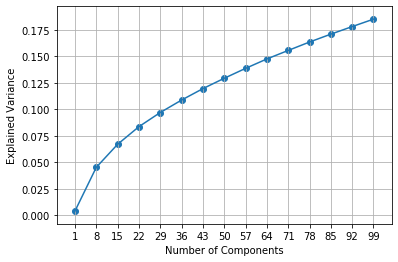

In [0]:
plt.plot(n_comp, exp_var)
plt.scatter(n_comp, exp_var)

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(ticks=n_comp)
plt.grid()
plt.show()

### Summary:
    - We can see in the curve that the max variance for the components we mentioned is explained by around 100 points

#### 1.14.2 Truncated SVD on Essay_tfidf

In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_train_essay_tfidf_truncated = svd.fit_transform(X_train_essay_tfidf)
X_test_essay_tfidf_truncated = svd.transform(X_test_essay_tfidf)

In [65]:
print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)
print('='*50)
print(X_train_essay_tfidf_truncated.shape)
print(X_test_essay_tfidf_truncated.shape)

(73196, 14266)
(36052, 14266)
(73196, 100)
(36052, 100)


In [66]:
print(svd.explained_variance_ratio_.sum())

0.18578622950281934


### Summary : 
    - It shows that 100 features gives 18.58% of expalined variance

In [67]:
print(X_train_Sstate.shape)
print(X_train_cat.shape)
print(X_train_subcat.shape)
print(X_train_grade.shape)
print(X_train_prefix.shape)
print(X_train_price.shape)
print(X_train_previous.shape)

print(X_train_essay_bow.shape)
print(X_train_essay_tfidf.shape)
print(len(X_train_essay_avg_w2v))
print(len(X_train_essay_tfidf_w2v))

print(X_train_title_bow.shape)
print(X_train_title_tfidf.shape)
print(len(X_train_title_avg_w2v))

print(X_train_quantity.shape)
print(X_train_sentiment.shape)
print(X_train_words_essay.shape)
print(X_train_words_title.shape)

print('='*50)
print(X_test_Sstate.shape)
print(X_test_cat.shape)
print(X_test_subcat.shape)
print(X_test_grade.shape)
print(X_test_prefix.shape)
print(X_test_price.shape)
print(X_test_previous.shape)

print(X_test_essay_bow.shape)
print(X_test_essay_tfidf.shape)
print(len(X_test_essay_avg_w2v))
print(len(X_test_essay_tfidf_w2v))

print(X_test_title_bow.shape)
print(X_test_title_tfidf.shape)
print(len(X_test_title_avg_w2v))
print(len(X_test_title_tfidf_w2v))

print(X_test_quantity.shape)
print(X_test_sentiment.shape)
print(X_test_words_essay.shape)
print(X_test_words_title.shape)

(73196, 51)
(73196, 9)
(73196, 30)
(73196, 4)
(73196, 5)
(73196, 1)
(73196, 1)
(73196, 14266)
(73196, 14266)
73196
73196
(73196, 2617)
(73196, 2617)
73196
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(36052, 51)
(36052, 9)
(36052, 30)
(36052, 4)
(36052, 5)
(36052, 1)
(36052, 1)
(36052, 14266)
(36052, 14266)
36052
36052
(36052, 2617)
(36052, 2617)
36052
36052
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)


## 2. Set - 1

### 2.1 Merging the above features required for Set-1

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

### 2.2 Merging the BOW for processed essays

In [0]:
#MERGING all together
from scipy.sparse import hstack
X_train_1 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix,X_train_previous, X_train_price, X_train_essay_bow, X_train_title_bow)).tocsr()
X_test_1 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix,X_test_previous, X_test_price, X_test_essay_bow, X_test_title_bow)).tocsr()


In [71]:
print(X_train_1.shape)
print(X_test_1.shape)

(73196, 16984)
(36052, 16984)


### 2.3 Grid Search CV

In [0]:
from sklearn.linear_model import SGDClassifier
classifier_1 = SGDClassifier(loss='hinge', n_jobs=-1, class_weight='balanced')

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [
                {
                    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                    'penalty' : ['l1', 'l2']
                }
            ]
gridsearch_1 = GridSearchCV(estimator=classifier_1, param_grid=parameters, scoring='roc_auc', cv=2, n_jobs=-1, return_train_score=True)

### Note:
    - I have used cv=2 because SVM is computationally very expensive.

In [0]:
gridsearch_1 = gridsearch_1.fit(X_train_1, y_train)

In [75]:
results = pd.DataFrame.from_dict(gridsearch_1.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,38.986708,5.820302,0.047053,0.001020,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.634888,0.635918,0.635403,0.000515,9,0.846074,0.844192,0.845133,0.000941
1,2.238752,0.377747,0.047302,0.001133,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.663070,0.656190,0.659630,0.003440,6,0.892185,0.920705,0.906445,0.014260
2,31.714369,3.370111,0.045500,0.000382,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.670312,0.658370,0.664341,0.005971,5,0.719977,0.716098,0.718037,0.001939
3,2.138949,0.277485,0.045437,0.002033,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.684356,0.689616,0.686986,0.002630,3,0.876496,0.897550,0.887023,0.010527
4,9.688318,6.135098,0.047219,0.000229,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.649820,0.651590,0.650705,0.000885,7,0.651825,0.656602,0.654213,0.002388


In [76]:
best_alpha_1 = gridsearch_1.best_params_['alpha']
best_penalty_1 = gridsearch_1.best_params_['penalty']
print('Best Alpha:', best_alpha_1)
print('Best Penalty:', best_penalty_1)

Best Alpha: 0.1
Best Penalty: l2


#### Note:
    - We can see that the best alpha is 0.1 and Regulariser is 'L2'

In [0]:
train_auc_1 = results['mean_train_score']
test_auc_1 = results['mean_test_score']
alpha_1 = results['param_alpha']

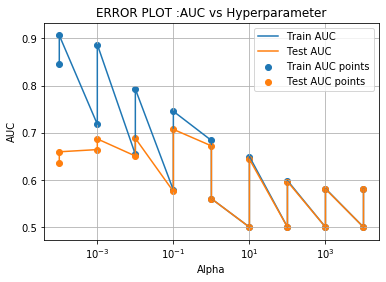

In [78]:
#plotting
plt.plot(alpha_1, train_auc_1, label='Train AUC')
plt.plot(alpha_1, test_auc_1, label='Test AUC')
plt.scatter(alpha_1, train_auc_1, label='Train AUC points')
plt.scatter(alpha_1, test_auc_1, label='Test AUC points')
plt.legend()
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('AUC')
plt.title('ERROR PLOT :AUC vs Hyperparameter')
plt.grid()
plt.show()

### 2.4 Modelling with best Alpha and penalty to find best AUC

In [0]:
classifier_withParam_1 = SGDClassifier(loss='hinge', alpha=best_alpha_1, penalty=best_penalty_1, class_weight='balanced')
classifier_withParam_1.fit(X_train_1, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 2.5 Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
cv_1 = cross_val_score(estimator=classifier_withParam_1, X=X_train_1, y=y_train, cv=5, scoring='roc_auc')

In [0]:
best_auc_1 = cv_1.mean()
print('Best AUC: %4f' %best_auc_1)

Best AUC: 0.639346


### 2.6 HyperParamter vs AUC

#### Note:
    - Since the "SVM" model doesn't give the predicted probabilites we can't use model.predict_proba and that's 
      why we use calibrated model

In [0]:
from sklearn.calibration import CalibratedClassifierCV
classifier_calib_1 = CalibratedClassifierCV(base_estimator = classifier_withParam_1, method='sigmoid', cv=3)
classifier_calib_1.fit(X_train_1, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
y_train_pred_1 = batch_predict(classifier_calib_1, X_train_1)
y_test_pred_1 = batch_predict(classifier_calib_1, X_test_1)

In [0]:
from sklearn.metrics import roc_curve, auc
train_fpr_1, train_tpr_1, train_thresh_1 = roc_curve(y_train, y_train_pred_1)
test_fpr_1, test_tpr_1, test_thresh_1 = roc_curve(y_test, y_test_pred_1)

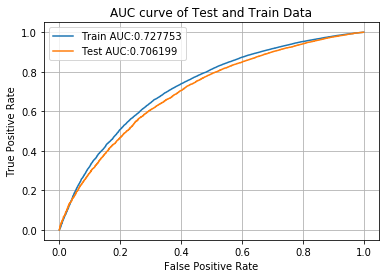

In [0]:
plt.plot(train_fpr_1, train_tpr_1, label='Train AUC:%4f'%auc(train_fpr_1, train_tpr_1))
plt.plot(test_fpr_1, test_tpr_1, label='Test AUC:%4f'%auc(test_fpr_1, test_tpr_1))

plt.title('AUC curve of Test and Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### 2.7 Finding Confusion Matrix

In [0]:
def find_best_threshold( fpr, tpr, threshold):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('the maximum tpr*(1-fpr) is :', max(tpr*(1-fpr)), 'for threshold', np.round(t,3))
    return t

In [0]:
best_t = find_best_threshold(train_fpr_1, train_tpr_1, train_thresh_1)

the maximum tpr*(1-fpr) is : 0.4536464662418969 for threshold 0.844


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix

cm_train_1 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_1, best_t))
cm_test_1 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_1, best_t))

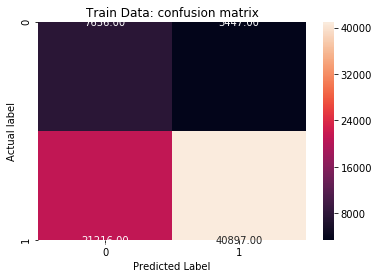

In [0]:
sns.heatmap(cm_train_1, annot=True, fmt='.2f')
plt.title('Train Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

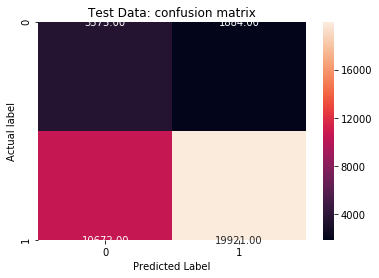

In [0]:
sns.heatmap(cm_test_1, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

# 3. Set-2:

    - we need Project_title_tfidf, Project_essay_tfidf

In [0]:
print(X_train_Sstate.shape)
print(X_train_cat.shape)
print(X_train_subcat.shape)
print(X_train_grade.shape)
print(X_train_prefix.shape)
print(X_train_essay_bow.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_bow.shape)
print(X_train_title_tfidf.shape)
print(X_train_price.shape)
print(X_train_previous.shape)
print(X_train_price_unstandardized.shape)

print('='*50)
print(X_test_Sstate.shape)
print(X_test_cat.shape)
print(X_test_subcat.shape)
print(X_test_grade.shape)
print(X_test_prefix.shape)
print(X_test_essay_bow.shape)
print(X_test_essay_tfidf.shape)
print(X_test_title_bow.shape)
print(X_test_title_tfidf.shape)
print(X_test_price.shape)
print(X_test_previous.shape)
print(X_test_price_unstandardized.shape)

(73196, 51)
(73196, 9)
(73196, 30)
(73196, 4)
(73196, 5)
(73196, 14266)
(73196, 14266)
(73196, 2617)
(73196, 2617)
(73196, 1)
(73196, 1)
(73196, 1)
(36052, 51)
(36052, 9)
(36052, 30)
(36052, 4)
(36052, 5)
(36052, 14266)
(36052, 14266)
(36052, 2617)
(36052, 2617)
(36052, 1)
(36052, 1)
(36052, 1)


In [0]:
# Merging all features
from scipy.sparse import hstack
X_train_2 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_previous, 
                       X_train_price, X_train_essay_tfidf, X_train_title_tfidf)).tocsr()

X_test_2 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_previous, 
                     X_test_price, X_test_essay_tfidf, X_test_title_tfidf)).tocsr()

In [80]:
print(X_train_2.shape)
print(X_test_2.shape)

(73196, 16984)
(36052, 16984)


In [81]:
print(y_train.shape)
print(y_test.shape)

(73196, 1)
(36052, 1)


### 2.2.2 Grid Search

In [0]:
classifier_2 = SGDClassifier(loss='hinge', n_jobs=-1, class_weight='balanced')

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [
                {
                    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                    'penalty' : ['l1', 'l2']
                }
            ]
gridsearch_2 = GridSearchCV(estimator=classifier_2, param_grid=parameters, scoring='roc_auc', cv=2, n_jobs=-1, return_train_score=True)

In [0]:
gridsearch_2 = gridsearch_2.fit(X_train_2 ,y_train)

In [0]:
best_alpha_2 = gridsearch_2.best_params_['alpha']
best_penalty_2 = gridsearch_2.best_params_['penalty']
print('Best alpha:', best_alpha_2)
print('Best Penalty:', best_penalty_2)

Best alpha: 0.0001
Best Penalty: l1


### Summary:
    - it shows that the best alpha= 0.0001 and best regularizer = 'l1'

In [85]:
results = pd.DataFrame.from_dict(gridsearch_2.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,6.313538,0.261264,0.050541,0.003552,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.664867,0.681799,0.673333,0.008466,1,0.718772,0.765125,0.741948,0.023176
1,1.864721,0.481270,0.046038,0.000681,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.578707,0.534879,0.556793,0.021914,14,0.676115,0.608854,0.642485,0.033630
2,2.674083,0.129233,0.046702,0.001393,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.648572,0.658734,0.653653,0.005081,3,0.655823,0.659239,0.657531,0.001708
3,2.602619,0.704590,0.046363,0.000448,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.629108,0.689000,0.659054,0.029946,2,0.690026,0.737287,0.713657,0.023631
4,1.789262,0.194896,0.047624,0.001276,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.607587,0.608713,0.608150,0.000563,7,0.607851,0.608915,0.608383,0.000532


In [0]:
train_auc_2 = results['mean_train_score']
test_auc_2 = results['mean_test_score']
alpha_2 = results['param_alpha']

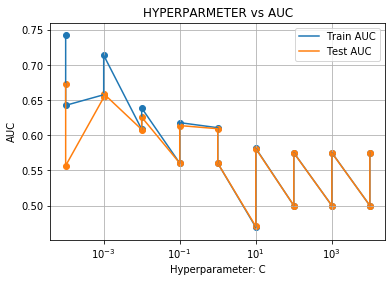

In [87]:
plt.plot(alpha_2, train_auc_2, label='Train AUC')
plt.plot(alpha_2, test_auc_2, label='Test AUC')
plt.scatter(alpha_2, train_auc_2)
plt.scatter(alpha_2, test_auc_2)

plt.title('HYPERPARMETER vs AUC')
plt.xlabel('Hyperparameter: C')
plt.xscale('log')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

### 2.2.3 Modelling with Parameters

In [0]:
classifier_withParam_2 = SGDClassifier(loss='hinge',alpha=best_alpha_2, penalty=best_penalty_2, class_weight='balanced', n_jobs=-1)
classifier_withParam_2.fit(X_train_2, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 2.2.4 Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
cv_2 = cross_val_score(estimator=classifier_withParam_2, X=X_train_2, y=y_train,cv=5, scoring='roc_auc')

In [0]:
best_auc_2 = cv_1.mean()
print('Best AUC:%4f' %best_auc_2)

Best AUC:0.639346


### 2.2.5 ROC curve on Train and Test Data

In [0]:
classifier_calib_2 = CalibratedClassifierCV(base_estimator=classifier_withParam_2, method='sigmoid', cv=3)
classifier_calib_2.fit(X_train_2, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l1',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        
    return y_data_pred

In [0]:
y_train_pred_2 = batch_predict(classifier_calib_2, X_train_2)
y_test_pred_2 = batch_predict(classifier_calib_2, X_test_2)

In [0]:
from sklearn.metrics import roc_curve, auc
train_fpr_2, train_tpr_2, train_thresh_2 = roc_curve(y_train, y_train_pred_2)
test_fpr_2, test_tpr_2, test_thresh_2 = roc_curve(y_test, y_test_pred_2)

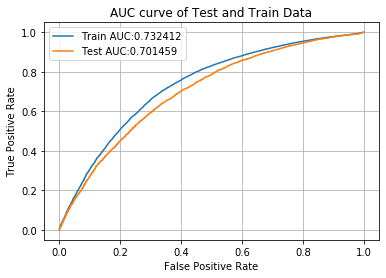

In [0]:
plt.plot(train_fpr_2, train_tpr_2, label='Train AUC:%4f'%auc(train_fpr_2, train_tpr_2))
plt.plot(test_fpr_2, test_tpr_2, label='Test AUC:%4f'%auc(test_fpr_2, test_tpr_2))

plt.title('AUC curve of Test and Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### 2.2.6 Confusion Matrix

In [0]:
def find_best_threshold(fpr, tpr, threshold):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('the maximum tpr*(1-fpr) is :', max(tpr*(1-fpr)), 'for threshold', np.round(t,3))
    return t

In [0]:
best_t = find_best_threshold(train_fpr_2, train_tpr_2, train_thresh_2)

the maximum tpr*(1-fpr) is : 0.46576396717517543 for threshold 0.834


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix

cm_train_2 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_2, best_t))
cm_test_2 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_2, best_t))

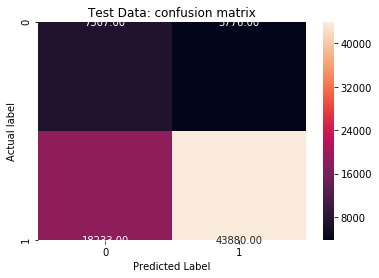

In [0]:
sns.heatmap(cm_train_2, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

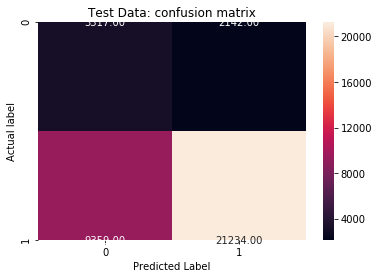

In [0]:
sns.heatmap(cm_test_2, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

# 3.1 Set - 3

In [0]:
from scipy.sparse import hstack
X_train_3 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_previous, X_train_price, X_train_essay_avg_w2v, X_train_title_avg_w2v)).tocsr()
X_test_3 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_previous, X_test_price, X_test_essay_avg_w2v, X_test_title_avg_w2v)).tocsr()

In [89]:
print(X_train_3.shape)
print(X_test_3.shape)

(73196, 701)
(36052, 701)


In [0]:
print(y_train.shape)
print(y_test.shape)

(73196, 1)
(36052, 1)


### 3.1.3 Grid Search

In [0]:
classifier_3 = SGDClassifier(loss='hinge', n_jobs=-1, class_weight='balanced')

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [
                {
                    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                    'penalty' : ['l1' , 'l2']
                }
            ]
gridsearch_3 = GridSearchCV(estimator=classifier_3, param_grid=parameters, scoring='roc_auc', cv=2, n_jobs=-1, return_train_score=True)

In [0]:
gridsearch_3 = gridsearch_3.fit(X_train_3 ,y_train)

In [0]:
best_alpha_3 = gridsearch_3.best_params_['alpha']
best_penalty_3 = gridsearch_3.best_params_['penalty']
print('Best alpha:', best_alpha_3)
print('Best Penalty:', best_penalty_3)

Best alpha: 0.0001
Best Penalty: l1


### Summary:
    - it shows that the best alpha=0.0001 and best regularizer is 'l1'.

In [93]:
results = pd.DataFrame.from_dict(gridsearch_3.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,21.614720,0.251105,0.088774,0.000468,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.672967,0.682684,0.677825,0.004859,2,0.706349,0.719493,0.712921,0.006572
1,6.859199,0.556081,0.090964,0.003289,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.560504,0.683089,0.621797,0.061292,4,0.583149,0.705985,0.644567,0.061418
2,16.511947,1.554221,0.095344,0.001379,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.674759,0.672677,0.673718,0.001041,3,0.684369,0.684422,0.684396,0.000027
3,7.003289,0.836922,0.089966,0.000481,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.683181,0.676040,0.679610,0.003570,1,0.715118,0.698870,0.706994,0.008124
4,9.801193,0.945046,0.090203,0.000315,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.580056,0.601535,0.590796,0.010740,8,0.580053,0.601239,0.590646,0.010593


In [0]:
train_auc_3 = results['mean_train_score']
test_auc_3 = results['mean_test_score']
alpha_3 = results['param_alpha']

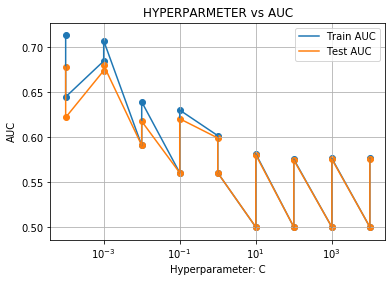

In [95]:
plt.plot(alpha_3, train_auc_3, label='Train AUC')
plt.plot(alpha_3, test_auc_3, label='Test AUC')
plt.scatter(alpha_3, train_auc_3)
plt.scatter(alpha_3, test_auc_3)

plt.title('HYPERPARMETER vs AUC')
plt.xlabel('Hyperparameter: C')
plt.xscale('log')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

### 3.1.4 Modelling with Parameters

In [0]:
classifier_withParam_3 = SGDClassifier(loss='hinge', alpha=best_alpha_3,  penalty=best_penalty_3, class_weight='balanced', n_jobs=-1)
classifier_withParam_3.fit(X_train_3, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 3.1.5 Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
cv_3 = cross_val_score(estimator=classifier_withParam_3, X=X_train_3, y=y_train,cv=5, scoring='roc_auc')

In [0]:
best_auc_3 = cv_1.mean()
print('Best AUC:%4f' %best_auc_3)

Best AUC:0.639346


### 3.1.6 ROC curve on Train and Test Data

In [0]:
classifier_calib_3 = CalibratedClassifierCV(base_estimator=classifier_withParam_3, method='sigmoid', cv=3)
classifier_calib_3.fit(X_train_3, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l1',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        
    return y_data_pred

In [0]:
y_train_pred_3 = batch_predict(classifier_calib_3, X_train_3)
y_test_pred_3 = batch_predict(classifier_calib_3, X_test_3)

In [0]:
from sklearn.metrics import roc_curve, auc
train_fpr_3, train_tpr_3, train_thresh_3 = roc_curve(y_train, y_train_pred_3)
test_fpr_3, test_tpr_3, test_thresh_3 = roc_curve(y_test, y_test_pred_3)

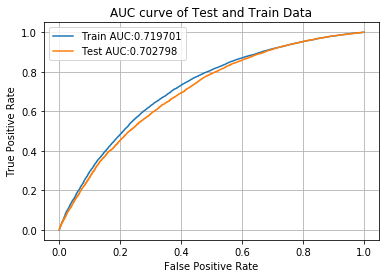

In [0]:
plt.plot(train_fpr_3, train_tpr_3, label='Train AUC:%4f'%auc(train_fpr_3, train_tpr_3))
plt.plot(test_fpr_3, test_tpr_3, label='Test AUC:%4f'%auc(test_fpr_3, test_tpr_3))

plt.title('AUC curve of Test and Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### 3.1.7 Confusion Matrix

In [0]:
def find_best_threshold(fpr, tpr, threshold):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('the maximum tpr*(1-fpr) is :', max(tpr*(1-fpr)), 'for threshold', np.round(t,3))
    return t

In [0]:
best_t = find_best_threshold(train_fpr_3, train_tpr_3, train_thresh_3)

the maximum tpr*(1-fpr) is : 0.4435081811835586 for threshold 0.831


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix

cm_train_3 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_3, best_t))
cm_test_3 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_3, best_t))

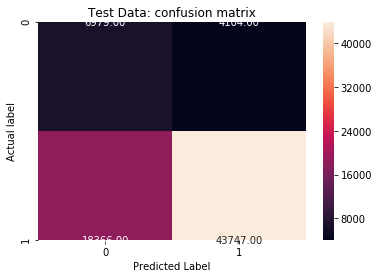

In [0]:
sns.heatmap(cm_train_3, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

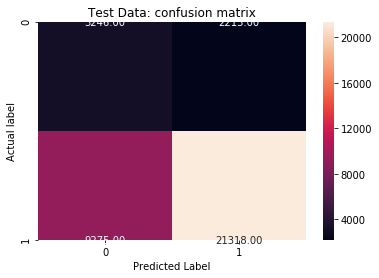

In [0]:
sns.heatmap(cm_test_3, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

# 4. Set -4

### 4.1 Merging all the columns

In [0]:
from scipy.sparse import hstack
X_train_4 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_previous, X_train_price, X_train_essay_tfidf_w2v, X_train_title_tfidf_w2v)).tocsr()
X_test_4 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_previous, X_test_price, X_test_essay_tfidf_w2v, X_test_title_tfidf_w2v)).tocsr()

In [97]:
print(X_train_4.shape)
print(X_test_4.shape)

(73196, 701)
(36052, 701)


### 4.2 Grid Search CV

In [0]:
classifier_4 = SGDClassifier(loss='hinge', class_weight = 'balanced', n_jobs=-1)

In [0]:
parameters = [
                {
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                    'penalty' : ['l1', 'l2']
                }
            ]
grid_search_4 = GridSearchCV(estimator=classifier_4, param_grid=parameters, scoring='roc_auc', cv=2, n_jobs=-1, return_train_score=True)

In [0]:
grid_search_4 = grid_search_4.fit(X=X_train_4, y=y_train)

In [101]:
results = pd.DataFrame.from_dict(grid_search_4.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,19.015590,0.310503,0.092224,0.002597,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.676914,0.648776,0.662845,0.014069,5,0.710562,0.665215,0.687888,0.022674
1,8.122140,0.907848,0.090846,0.002074,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.670734,0.656427,0.663581,0.007153,4,0.704798,0.677224,0.691011,0.013787
2,12.771864,2.657170,0.089949,0.000406,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.687621,0.678834,0.683228,0.004394,2,0.699481,0.692757,0.696119,0.003362
3,6.693758,1.926015,0.095923,0.001910,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.686450,0.691893,0.689171,0.002722,1,0.719763,0.723273,0.721518,0.001755
4,8.116126,0.055323,0.091778,0.001841,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.597022,0.601397,0.599210,0.002187,8,0.598103,0.600127,0.599115,0.001012


In [0]:
train_auc_4 = results['mean_train_score']
test_auc_4 = results['mean_test_score']
best_alpha_4 = results['param_alpha']

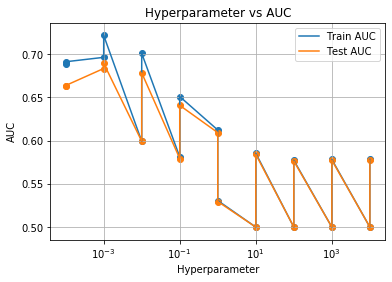

In [103]:
plt.plot(best_alpha_4, train_auc_4, label='Train AUC')
plt.plot(best_alpha_4, test_auc_4, label='Test AUC')
plt.scatter(best_alpha_4, train_auc_4)
plt.scatter(best_alpha_4, test_auc_4)

plt.title('Hyperparameter vs AUC')
plt.xlabel('Hyperparameter')
plt.xscale('log')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
best_alpha_4 = grid_search_4.best_params_['alpha']
best_penalty_4 = grid_search_4.best_params_['penalty']
print('Best_alpha:', best_alpha_4)
print('Best penalty:', best_penalty_4)

Best_alpha: 0.001
Best penalty: l1


### 4.3 Modelling with Parameters

In [0]:
classifier_4_withParam = SGDClassifier(loss='hinge', alpha=best_alpha_4, penalty=best_penalty_4, class_weight='balanced', n_jobs=-1)
classifier_4_withParam.fit(X_train_4, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 4.4 Cross validate

In [0]:
cv_4 = cross_val_score(estimator=classifier_4_withParam, X=X_train_4, y=y_train, cv=5, n_jobs=-1)

In [0]:
best_auc_4 = cv_4.mean()
print('Best AUC: %4f' %best_auc_4)

Best AUC: 0.529483


### 4.5 AUC CURVE

In [0]:
classifier_calib_4 = CalibratedClassifierCV(base_estimator=classifier_4_withParam ,method='sigmoid', cv=3)
classifier_calib_4.fit(X_train_4,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l1',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,tr_loop,1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [0]:
y_train_pred_4 = batch_predict(classifier_calib_4, X_train_4)
y_test_pred_4 = batch_predict(classifier_calib_4, X_test_4)

In [0]:
train_fpr_4, train_tpr_4, train_threshold_4 = roc_curve(y_train, y_train_pred_4)
test_fpr_4, test_tpr_4, train_threshold_4 = roc_curve(y_test, y_test_pred_4)

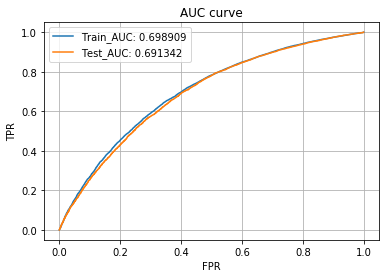

In [0]:
plt.plot(train_fpr_4, train_tpr_4, label='Train_AUC: %4f' %auc(train_fpr_4, train_tpr_4))
plt.plot(test_fpr_4, test_tpr_4, label='Test_AUC: %4f' %auc(test_fpr_4, test_tpr_4))

plt.title('AUC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

### 4.1.10 Confusion matrix

In [0]:
def find_best_threshold( fpr, tpr, threshold):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('the maximum tpr*(1-fpr) is :', max(tpr*(1-fpr)), 'for threshold', np.round(t,3))
    return t

In [0]:
best_t = find_best_threshold(train_fpr_4, train_tpr_4, train_threshold_4)

the maximum tpr*(1-fpr) is : 0.4233043741667497 for threshold 0.753


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix

cm_train_4 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_4, best_t))
cm_test_4 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_4, best_t))

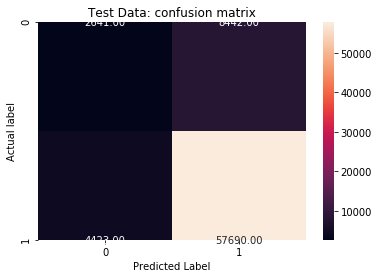

In [0]:
sns.heatmap(cm_train_4, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

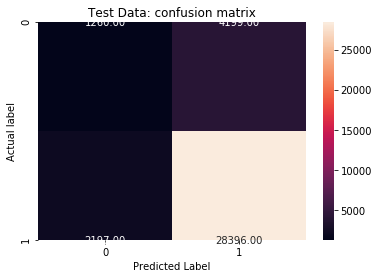

In [0]:
sns.heatmap(cm_test_4, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

## 5. Set-5

### 5.1 Merging all the columns

In [0]:
from scipy.sparse import hstack
X_train_5 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_previous, X_train_price, X_train_sentiment, X_train_words_essay, X_train_words_title, X_train_essay_tfidf_truncated)).tocsr()
X_test_5 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_previous, X_test_price, X_test_sentiment, X_test_words_essay, X_test_words_title, X_test_essay_tfidf_truncated)).tocsr()

In [105]:
print(X_train_5.shape)
print(X_test_5.shape)

(73196, 204)
(36052, 204)


### 4.2 Grid Search CV

In [0]:
from sklearn.linear_model import SGDClassifier
classifier_5 = SGDClassifier(loss='hinge', class_weight='balanced', n_jobs=-1)

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [
                {
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                    'penalty' : ['l1', 'l2']
                }
            ]
grid_search_5 = GridSearchCV(estimator=classifier_5, param_grid=parameters, scoring='roc_auc', cv=2, n_jobs=-1, return_train_score=True)

In [0]:
grid_search_5 = grid_search_5.fit(X=X_train_5, y=y_train)

In [109]:
results = pd.DataFrame.from_dict(grid_search_5.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,10.340929,0.075042,0.031564,0.000454,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",0.662826,0.674167,0.668496,0.005671,1,0.674479,0.683561,0.679020,0.004541
1,6.930590,0.208327,0.031741,0.000266,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",0.668593,0.539998,0.604295,0.064298,6,0.681187,0.536620,0.608903,0.072284
2,11.350521,0.693001,0.033103,0.000213,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",0.662138,0.643130,0.652634,0.009504,2,0.664709,0.649904,0.657307,0.007403
3,7.214486,0.184703,0.031401,0.000529,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",0.647872,0.652828,0.650350,0.002478,3,0.651495,0.660629,0.656062,0.004567
4,3.530934,0.387456,0.031235,0.000941,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",0.591339,0.592987,0.592163,0.000824,9,0.595332,0.592116,0.593724,0.001608


In [0]:
train_auc_5 = results['mean_train_score']
test_auc_5 = results['mean_test_score']
best_alpha_5 = results['param_alpha']

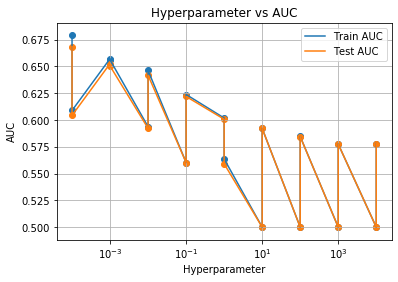

In [111]:
plt.plot(best_alpha_5, train_auc_5, label='Train AUC')
plt.plot(best_alpha_5, test_auc_5, label='Test AUC')
plt.scatter(best_alpha_5, train_auc_5)
plt.scatter(best_alpha_5, test_auc_5)

plt.title('Hyperparameter vs AUC')
plt.xlabel('Hyperparameter')
plt.xscale('log')
plt.ylabel('AUC')
plt.legend()
plt.grid()
plt.show()

In [0]:
best_alpha_5 = grid_search_5.best_params_['alpha']
best_penalty_5 = grid_search_5.best_params_['penalty']
print('Best_alpha:', best_alpha_5)
print('Best penalty:', best_penalty_5)

Best_alpha: 0.0001
Best penalty: l1


### 4.3 Modelling with Parameters

In [0]:
classifier_5_withParam = SGDClassifier(loss='hinge', alpha=best_alpha_5, penalty=best_penalty_5, class_weight='balanced', n_jobs=-1)
classifier_5_withParam.fit(X_train_5, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 4.4 Cross validate

In [0]:
from sklearn.model_selection import cross_val_score
cv_5 = cross_val_score(estimator=classifier_5_withParam, X=X_train_5, y=y_train, cv=5, n_jobs=-1)

In [0]:
best_auc_5 = cv_5.mean()
print('Best AUC: %4f' %best_auc_5)

Best AUC: 0.700952


### 4.5 AUC CURVE

In [0]:
from sklearn.calibration import CalibratedClassifierCV
classifier_calib_5 = CalibratedClassifierCV(base_estimator = classifier_5_withParam, method='sigmoid', cv=3)
classifier_calib_5.fit(X_train_5, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l1',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,tr_loop,1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [0]:
y_train_pred_5 = batch_predict(classifier_calib_5, X_train_5)
y_test_pred_5 = batch_predict(classifier_calib_5, X_test_5)

In [0]:
from sklearn.metrics import roc_curve, auc
train_fpr_5, train_tpr_5, train_threshold_5 = roc_curve(y_train, y_train_pred_5)
test_fpr_5, test_tpr_5, train_threshold_5 = roc_curve(y_test, y_test_pred_5)

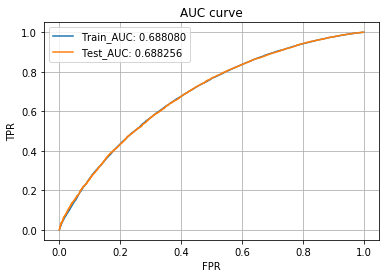

In [0]:
plt.plot(train_fpr_5, train_tpr_5, label='Train_AUC: %4f' %auc(train_fpr_5, train_tpr_5))
plt.plot(test_fpr_5, test_tpr_5, label='Test_AUC: %4f' %auc(test_fpr_5, test_tpr_5))

plt.title('AUC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

### 4.1.10 Confusion matrix

In [0]:
def find_best_threshold( fpr, tpr, threshold):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print('the maximum tpr*(1-fpr) is :', max(tpr*(1-fpr)), 'for threshold', np.round(t,3))
    return t

In [0]:
best_t = find_best_threshold(train_fpr_5, train_tpr_5, train_threshold_5)

the maximum tpr*(1-fpr) is : 0.40771797343235755 for threshold 0.721


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix

cm_train_5 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_5, best_t))
cm_test_5 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_5, best_t))

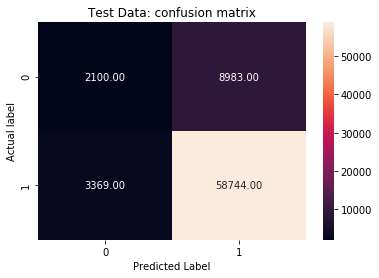

In [0]:
sns.heatmap(cm_train_5, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

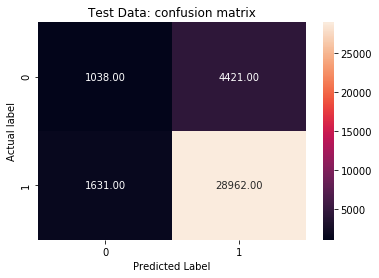

In [0]:
sns.heatmap(cm_test_5, annot=True, fmt='.2f')
plt.title('Test Data: confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

## Summary:

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Set Number', 'Vectorizer', 'Model', 'Algorithm', 'Best Hyperparameter: Alpha', 'Best Hyperparameter: Penalty', 'Best AUC']
x.add_row(['Set-1', 'BOW', 'SVM', 'linear', str(best_alpha_1), str(best_penalty_1), '%4f'%best_auc_1])
x.add_row(['Set-2', 'TFIDF', 'SVM', 'linear', str(best_alpha_2), str(best_penalty_2), '%4f'%best_auc_2])
x.add_row(['Set-3', 'AvgW2V', 'SVM', 'linear', str(best_alpha_3), str(best_penalty_3), '%4f'%best_auc_3])
x.add_row(['Set-4', 'TFIDFW2V', 'SVM', 'linear', str(best_alpha_4), str(best_penalty_4), '%4f'%best_auc_4])
x.add_row(['Set-5', 'Trucated TFIDF', 'SVM', 'linear', str(best_alpha_5), str(best_penalty_5), '%4f'%best_auc_5])

print(x)

+------------+----------------+-------+-----------+----------------------------+------------------------------+----------+
| Set Number |   Vectorizer   | Model | Algorithm | Best Hyperparameter: Alpha | Best Hyperparameter: Penalty | Best AUC |
+------------+----------------+-------+-----------+----------------------------+------------------------------+----------+
|   Set-1    |      BOW       |  SVM  |   linear  |           0.0001           |              l1              | 0.69123  |
|   Set-2    |     TFIDF      |  SVM  |   linear  |           0.0001           |              l1              | 0.69123  |
|   Set-3    |     AvgW2V     |  SVM  |   linear  |           0.0001           |              l1              | 0.69123  |
|   Set-4    |    TFIDFW2V    |  SVM  |   linear  |           0.0001           |              l1              | 0.77607  |
|   Set-5    | Trucated TFIDF |  SVM  |   linear  |           0.0001           |              l1              | 0.70095  |
+------------+--

# That's the end of the code